In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# можем дополнительно посмотреть процесс формирования весов
step1 = np.random.random((3,1))
print(step1, end='\n\n')
step2 = step1 - 1 
print(step2, end='\n\n')
step3 = 2 * step2
print(step3)

[[0.30233257]
 [0.14675589]
 [0.09233859]]

[[-0.69766743]
 [-0.85324411]
 [-0.90766141]]

[[-1.39533485]
 [-1.70648822]
 [-1.81532281]]


In [ ]:
# вычисление сигмоид функции

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

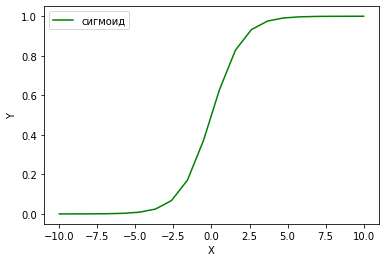

In [ ]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,20)
Y = sigmoid(X)

plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

А вот, как например на Python, можно реализовать упомянутую выше функцию активации Relu - 

In [ ]:
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)

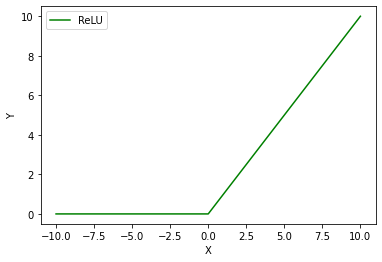

In [ ]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,21)
Y = ReLU(X)

plt.plot(X ,  Y ,'-g',label = 'ReLU' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
''' 
Исходный код к уроку 1.
Демонстрация работы градиентного спуска 
'''

# первоначальное точка
start_point = 1

# размер шага(learning rate)
learn_r = 0.01

# установка первоначальной точности
precision = 0.0001

# функция градиента для y = X**4 - 3 * X**3 
gr_func = lambda x: 4 * x**3 - 9 * x**2

# для картинки
D  = 1

X = np.linspace(2.2-D,2.2+D,20)
Y = X**4 - 3 * X**3 

# начальная точка
next_point = start_point

iter = 0 

x = []
x.append(next_point)

Итерация: 1
Текущая точка 1| След-я точка 1.05
Дистан-я между текущей точк. и след. 0.050000000000000044
--------------------------------------------------------
Итерация: 2
Текущая точка 1.05| След-я точка 1.1029200000000001
Дистан-я между текущей точк. и след. 0.05292000000000008
--------------------------------------------------------
Итерация: 3
Текущая точка 1.1029200000000001| След-я точка 1.1587338168953165
Дистан-я между текущей точк. и след. 0.05581381689531639
--------------------------------------------------------
минимум 1.1587338168953165, количество затраченных итераций: 3


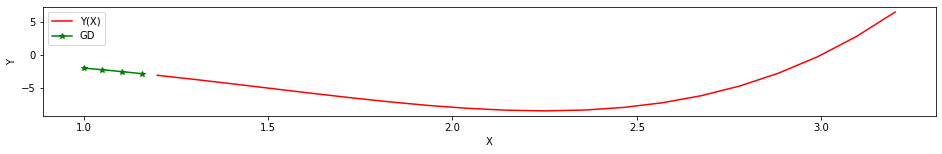

In [ ]:

plt.figure(figsize=(16,2))
plt.plot(X,  Y ,'r',label = 'Y(X)' )

# количество итерация 
n = 3
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learn_r*gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {iter}")
    print(f"Текущая точка {current_point}| След-я точка {next_point}")
    print(f"Дистан-я между текущей точк. и след. {abs(current_point - next_point)}")
    print("--------------------------------------------------------")
    
    
    if(abs(current_point - next_point) <= precision):
        break

print(f"минимум {next_point}, количество затраченных итераций: {iter}") 
X_grad = np.array(x)
plt.plot(X_grad ,  (X_grad **4 - 3 * X_grad **3) ,'-*g',label = 'GD' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
'''
Исходный код к уроку 1.
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)

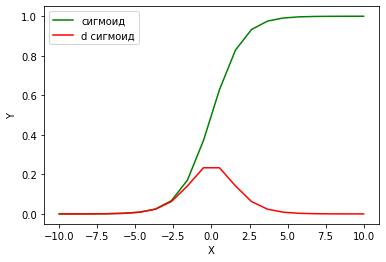

In [ ]:
# для картинки
D  = 10

X = np.linspace(0-D,0+D,20)
Y = sigmoid(X)
dY = sigm_deriv(sigmoid(X))

plt.plot(X ,  Y ,'-g',label = 'сигмоид' )
plt.plot(X ,  dY ,'-r',label = 'd сигмоид' )
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

In [ ]:
# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 15000)
print("веса после завершения обучения: ")
print(synaptic_weights)

# получение трех чисел от пользователя
user_inp1 = str(input("Первое число(0 или 1): "))
user_inp2 = str(input("Второе число(0 или 1): "))
user_inp3 = str(input("Третье число(0 или 1): "))

print("Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([user_inp1, user_inp2, user_inp3])))


веса после завершения обучения: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]
Первое число(0 или 1): 1
Второе число(0 или 1): 0
Третье число(0 или 1): 0
Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}
Предсказание нейронной сети: 
[0.9999584]


## Пример построения  двухслойной нейронной сети на numpy

In [ ]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [ ]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

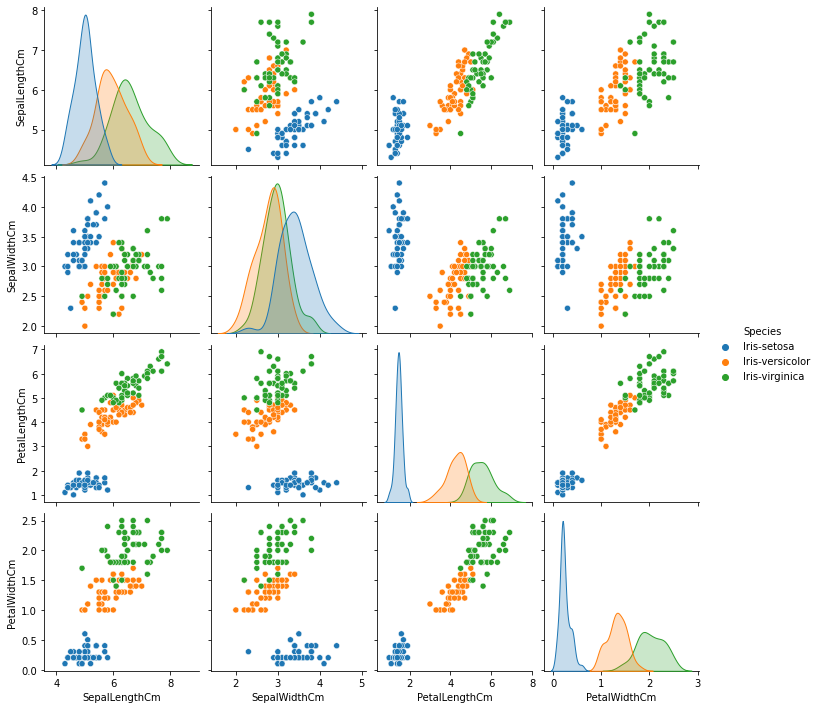

In [ ]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv('/content/drive/My Drive/gb/Iris.csv')
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

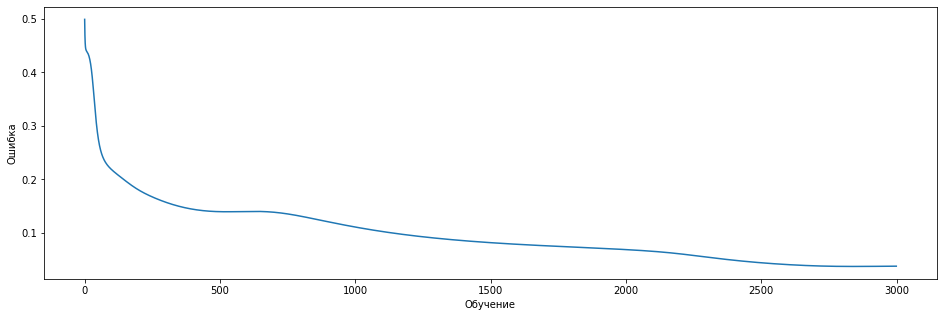

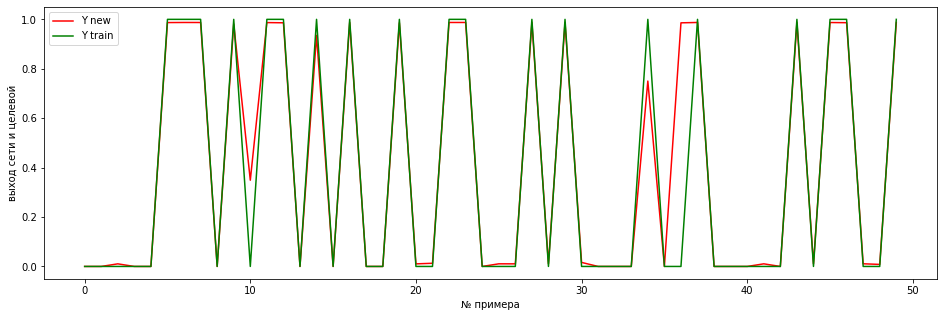

Аккуратность нейронной сети 96.19%


In [ ]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



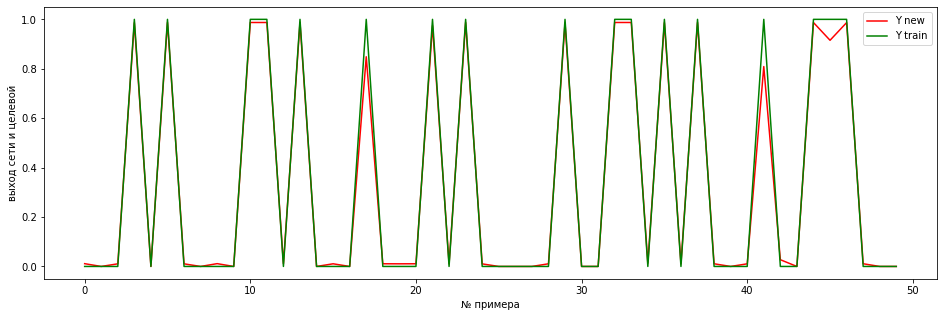

Аккуратность нейронной сети на тесте 98.59%


In [ ]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [ ]:
def testfunc(neuron_numb = 5, n = 0.1):
  # определим число нейронов скрытого слоя
  # neuron_numb = 5

  # присваевание случайных весов
  av = 0
  for _ in range(1,4):

    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    # n = 0.1

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(3000):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    av += round(accuracy,2)
    #print(av)

  layer0_t = X_test
  layer1_t = sigmoid(np.dot(layer0_t, w0))
  layer2_t = sigmoid(np.dot(layer1_t, w1))
  layer2_error_t = y_test - layer2_t
      
  # метрика модели
  error_t = np.mean(np.abs(layer2_error_t))
  accuracy_t = (1 - error_t) * 100
  #print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")
          
  #print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
  return str(round(av/3,2)), str(round(accuracy_t,2))

In [ ]:
from pprint import pprint

In [ ]:
res_fin = []
for lr in range(1,7):
  for neuron_numb_count in range (1, 30):
    dict_w_r = {}
    res_tr, res_test = testfunc(neuron_numb = neuron_numb_count, n = lr/10)
    dict_w_r['neurn_numb'] = neuron_numb_count
    dict_w_r['lr'] = lr/10
    dict_w_r['acc_tr'] = res_tr
    dict_w_r['acc_test'] = res_test
    res_fin.append(dict_w_r)

pprint(res_fin)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


[{'acc_test': '60.0', 'acc_tr': '57.87', 'lr': 0.1, 'neurn_numb': 1},
 {'acc_test': '77.93', 'acc_tr': '77.89', 'lr': 0.1, 'neurn_numb': 2},
 {'acc_test': '93.82', 'acc_tr': '94.21', 'lr': 0.1, 'neurn_numb': 3},
 {'acc_test': '97.73', 'acc_tr': '95.59', 'lr': 0.1, 'neurn_numb': 4},
 {'acc_test': '97.63', 'acc_tr': '94.89', 'lr': 0.1, 'neurn_numb': 5},
 {'acc_test': '98.18', 'acc_tr': '95.63', 'lr': 0.1, 'neurn_numb': 6},
 {'acc_test': '97.19', 'acc_tr': '95.77', 'lr': 0.1, 'neurn_numb': 7},
 {'acc_test': '96.53', 'acc_tr': '95.12', 'lr': 0.1, 'neurn_numb': 8},
 {'acc_test': '97.28', 'acc_tr': '95.29', 'lr': 0.1, 'neurn_numb': 9},
 {'acc_test': '97.08', 'acc_tr': '95.13', 'lr': 0.1, 'neurn_numb': 10},
 {'acc_test': '92.73', 'acc_tr': '94.14', 'lr': 0.1, 'neurn_numb': 11},
 {'acc_test': '95.54', 'acc_tr': '94.51', 'lr': 0.1, 'neurn_numb': 12},
 {'acc_test': '96.91', 'acc_tr': '95.13', 'lr': 0.1, 'neurn_numb': 13},
 {'acc_test': '96.89', 'acc_tr': '95.55', 'lr': 0.1, 'neurn_numb': 14},
 {

'acc_test': '99.41', 'acc_tr': '80.84', 'lr': 0.6, 'neurn_numb': 5